<a href="https://colab.research.google.com/github/palak001/GC-I/blob/master/Ecommerce_Customer_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!git clone https://github.com/palak001/GC-I.git

Cloning into 'GC-I'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 55 (delta 18), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [4]:
# Reading csv file from my github repo
df = pd.read_csv('GC-I/Datasets/Linear Regression/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


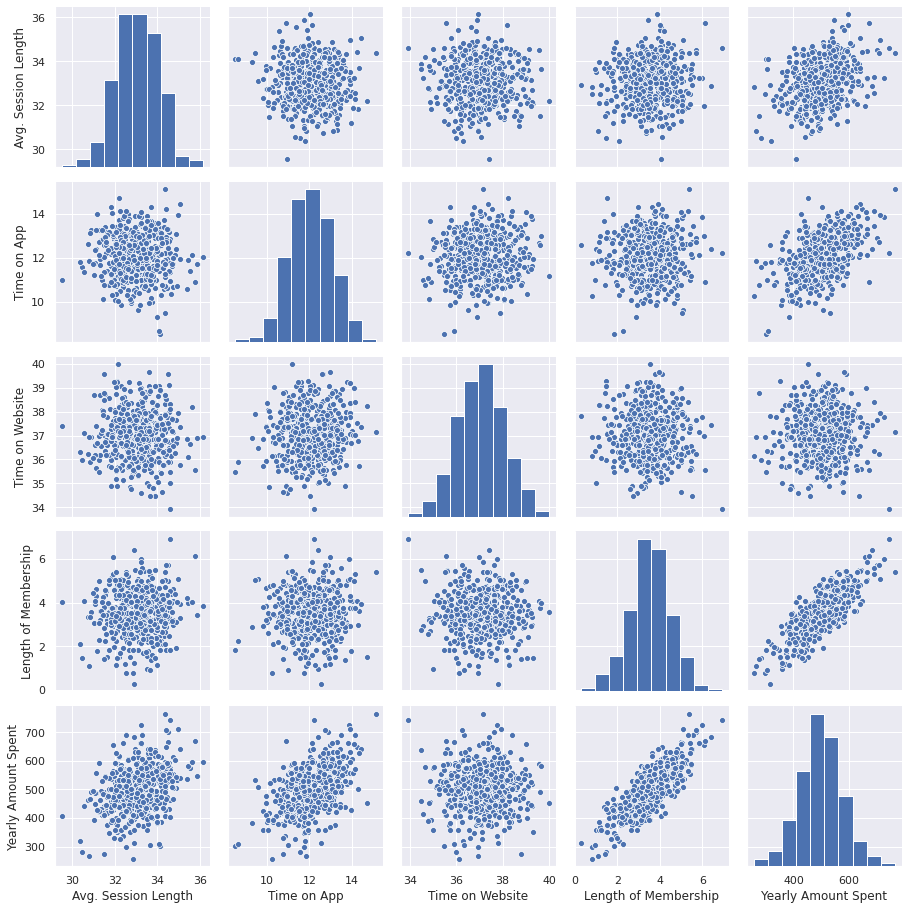

In [7]:
# to switch to seaborn defaults styling
sns.set()

# to pairwise plot graphs between the columns
sns.pairplot(df)

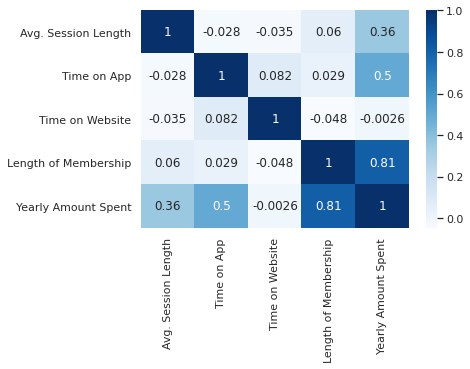

In [8]:
# Heatmaps to understand data 
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [9]:
#splitting up the data into training and testing data
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
# training the model through Linear Regression
from sklearn.linear_model import LinearRegression

In [13]:
# creating an instance of linear regression() model
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# print out the coefficents of the model
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [16]:
# since we are done with fitting our model, we will now evaluate its performance by predicting values
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

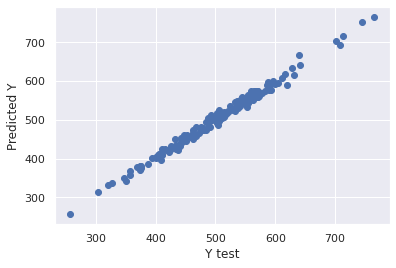

In [17]:
# Lets create a scatterplot of real test values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [20]:
# Our prediction looks pretty well!

In [18]:
# Evaluating the Model
from sklearn import metrics

In [19]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Error: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  7.2281486534308295
Mean Squared Error:  79.8130516509743
Root Mean Error:  8.933815066978626


In [21]:
# interpreting the coefficents
coefficents = pd.DataFrame(lm.coef_, X.columns)
coefficents.columns = ['Coefficent']
coefficents

,Coefficent
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
# From the above table, it is clear that the time spent on the mobile app plays much more important role in deciding yearly amount spent than time spent on the website.
# so as far as this question is concerned that Do you think the company should focus more on their mobile app or on their website?
# Well, There are 2 ways to think about it
# i) Work on mobile app experience as it is playing important role in deciding yearly amount spent by the customers
# ii) Develop the website to catch up to the performance of the mobile app. 